In [1]:
! pip3 install Pillow
! pip3 install graphviz pydotplus
! pip3 install pydot
! pip3 install pydotplus
! pip3 install graphviz
! python3 -m pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
########## Importation des librairies ##########

from PIL import Image
from PIL.ExifTags import TAGS
import json
import os
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial import KDTree
from webcolors import (CSS3_HEX_TO_NAMES, hex_to_rgb,)
import random
from IPython.display import clear_output
import kaggle
import zipfile

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
! kaggle datasets download -d vishalsubbiah/pokemon-images-and-types
os.getcwd()
import zipfile
with zipfile.ZipFile('pokemon-images-and-types.zip', 'r') as zip_ref:
    zip_ref.extractall('ImagesPokemonUNZIPPED')

pokemon-images-and-types.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
########## Conversion des couleurs ##########

def convert_P_to_RGBA():
    dossier = "ImagesPokemonUNZIPPED/images/images"
    for filename in os.listdir(dossier):
        imagename = os.path.join(dossier, filename)

        if os.path.isfile(imagename):
            image = Image.open(imagename)
            if image.mode == 'P':
                image2 = image.convert('RGBA')
                image2.save(image.filename)
    return "Ok"

convert_P_to_RGBA()

'Ok'

In [4]:
i=0
dossier = "ImagesPokemon"
for filename in os.listdir(dossier):
    imagename = os.path.join(dossier, filename)
    if os.path.isfile(imagename):
        image = Image.open(imagename)
    
    info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
    }

    for label,value in info_dict.items():
        print(f"{label:25}: {value}")

Filename                 : ImagesPokemon/parasect.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/lumineon.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/raikou.png
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format             : PNG
Image Mode               : RGBA
Image is Animated        : False
Frames in Image          : 1
Filename                 : ImagesPokemon/comfey.jpg
Image Size               : (120, 120)
Image Height             : 120
Image Width              : 120
Image Format 

In [5]:
#"function that convert RGB numbers into a color name"
def rgb_to_name(rgb):
    # a disctionnary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb)
    return f'{names[index]}'

#En dessous, on trouve les couleurs prédominantes de chaque image

def find_predominant_color(imagepath):

    nombre_couleurs = 5 #Un de plus que ce qu'on veux

    imgfile = Image.open(imagepath)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    clusters = MiniBatchKMeans(n_clusters=nombre_couleurs)
    clusters.fit(numarray)
    npbins = numpy.arange(0, nombre_couleurs+1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    [list1,list2] = histogram
    list1,list2 = zip(*sorted(zip(list1,list2),reverse=True))
    histogram_sort = [list1,list2]

    labels = numpy.unique(clusters.labels_)
    #barlist = plot.bar(labels[1:], histogram_sort[0][1:])
    list_colors = []
    colornames = []
    for i in range(nombre_couleurs-1):
        list_colors.append(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][2]),
            )
        )
        #barlist[i].set_color(
        #    "#%02x%02x%02x"
        #    % (
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
        #        math.ceil(clusters.cluster_centers_[list2[i+1]][2]),
        #    )
        #)
        rgb = [math.ceil(clusters.cluster_centers_[list2[i+1]][0]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][1]),
                math.ceil(clusters.cluster_centers_[list2[i+1]][2]),]
        colornames.append(rgb_to_name(rgb))
    #plot.show()
    #fig,ax = plot.subplots()
    #ax.pie(histogram_sort[0][1:], startangle=90, colors=list_colors)
    #ax.axis('equal')
    #plot.show()

    return colornames

In [6]:
########## Création du fichier JSON ##########

def write_json(filename, data):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

import os
toutes_les_infos = []
df = pd.read_csv('All_Pokemon.csv', sep=',')
dossier = "ImagesPokemonUNZIPPED/images/images/"
for filename in os.listdir(dossier):
    imagename = os.path.join(dossier, filename)
    if os.path.isfile(imagename):
        image = Image.open(imagename)
        couleur = find_predominant_color(imagename)

        for i in range(len(df)):
            if df["Name"][i].lower() == image.filename.split(".")[0].split("/")[3]:
                #type2 = df["Type 2"][i]
                #if type2 == "NaN":
                #    type2 = "None"
                info_dict = {
                "Filename": image.filename,
                "Name" : image.filename.split(".")[0].split("/")[3].capitalize(),
                "Image Size": image.size,
                "Image Height": image.height,
                "Image Width": image.width,
                "Image Format": image.format,
                "Image Mode": image.mode,
                "Image is Animated": getattr(image, "is_animated", False),
                "Frames in Image": getattr(image, "n_frames", 1),
                "Predominant color": [
                    couleur[0],
                    couleur[1],
                    couleur[2],
                    couleur[3]
                ],
                "Type 1": df["Type 1"][i],
                #"Type 2": type2,
                "Generation": df["Generation"][i],
                "Legendary": df["Legendary"][i],
                "Mega Evolution": df["Mega Evolution"][i],
                "Height": df["Height"][i],
                "Weight": df["Weight"][i],
                }
                toutes_les_infos.append(info_dict)
                print("Pokemon trouvé : " + image.filename.split(".")[0].split("/")[3].capitalize())
                break

write_json("pokemonjson.json", toutes_les_infos)

Pokemon trouvé : Parasect
Pokemon trouvé : Lumineon
Pokemon trouvé : Raikou
Pokemon trouvé : Comfey
Pokemon trouvé : Dedenne
Pokemon trouvé : Pyroar
Pokemon trouvé : Articuno
Pokemon trouvé : Magmortar
Pokemon trouvé : Bulbasaur
Pokemon trouvé : Banette
Pokemon trouvé : Staraptor
Pokemon trouvé : Pidove
Pokemon trouvé : Taillow
Pokemon trouvé : Charizard
Pokemon trouvé : Infernape
Pokemon trouvé : Sandshrew
Pokemon trouvé : Alakazam
Pokemon trouvé : Lickitung
Pokemon trouvé : Starmie
Pokemon trouvé : Yanmega
Pokemon trouvé : Yveltal
Pokemon trouvé : Zigzagoon
Pokemon trouvé : Petilil
Pokemon trouvé : Torterra
Pokemon trouvé : Purugly
Pokemon trouvé : Cresselia
Pokemon trouvé : Regigigas
Pokemon trouvé : Palkia
Pokemon trouvé : Marshadow
Pokemon trouvé : Froakie
Pokemon trouvé : Munna
Pokemon trouvé : Bellossom
Pokemon trouvé : Gabite
Pokemon trouvé : Mareep
Pokemon trouvé : Shieldon
Pokemon trouvé : Stoutland
Pokemon trouvé : Accelgor
Pokemon trouvé : Makuhita
Pokemon trouvé : Seviper


In [7]:
########## Récupération des tags relatifs aux images ##########

def get_all_tags():
    tags = []
    with open('pokemonjson.json', 'r') as f:
        jason = json.load(f)
    for pokemon in jason:
        tags.append([pokemon["Filename"].split(".")[0].split("/")[3].capitalize(),pokemon["Predominant color"][0],pokemon["Predominant color"][1],pokemon["Predominant color"][2],pokemon["Predominant color"][3],pokemon["Type 1"],pokemon["Generation"],pokemon["Legendary"],pokemon["Mega Evolution"],pokemon["Height"],pokemon["Weight"]])
    return tags

print(get_all_tags())

[['Parasect', 'sandybrown', 'pink', 'sienna', 'silver', 'Bug', 1.0, 0.0, 0.0, 1.0, 29.5], ['Lumineon', 'darkslategray', 'paleturquoise', 'cadetblue', 'silver', 'Water', 4.0, 0.0, 0.0, 1.2, 24.0], ['Raikou', 'gold', 'darkgray', 'whitesmoke', 'dimgray', 'Electric', 2.0, 1.0, 0.0, 1.9, 178.0], ['Comfey', 'indianred', 'darkgray', 'sandybrown', 'palegoldenrod', 'Fairy', 7.0, 0.0, 0.0, 0.1, 0.3], ['Dedenne', 'sandybrown', 'darkslategray', 'silver', 'palegoldenrod', 'Electric', 6.0, 0.0, 0.0, 0.2, 2.2], ['Pyroar', 'sandybrown', 'indianred', 'sienna', 'silver', 'Fire', 6.0, 0.0, 0.0, 1.5, 81.5], ['Articuno', 'cornflowerblue', 'slategray', 'lavender', 'silver', 'Ice', 1.0, 1.0, 0.0, 1.7, 55.4], ['Magmortar', 'chocolate', 'sandybrown', 'darkolivegreen', 'silver', 'Fire', 4.0, 0.0, 0.0, 1.6, 68.0], ['Bulbasaur', 'powderblue', 'darkseagreen', 'dimgray', 'black', 'Grass', 1.0, 0.0, 0.0, 0.7, 6.9], ['Banette', 'darkgray', 'dimgray', 'darkgray', 'silver', 'Ghost', 3.0, 0.0, 0.0, 1.1, 12.5], ['Starapt

In [8]:
########## Récupération d'une image aléatoire et de ses tags ##########

def random_image_and_tags():
    dossier = "ImagesPokemonUNZIPPED/images/images/"
    imagename = random.choice(os.listdir(dossier))
    image = Image.open(os.path.join(dossier, imagename))
    
    tags = []
    for pokemon in get_all_tags():
        if image.filename.split(".")[0].split("/")[3].capitalize() in pokemon[0]:
            tags.append(pokemon[1])
            #tags.append(pokemon[2])
            #tags.append(pokemon[3])
            #tags.append(pokemon[4])
            tags.append(pokemon[5])
            tags.append(pokemon[6])
            tags.append(pokemon[7])
            #tags.append(pokemon[8])
            #tags.append(pokemon[9])
            #tags.append(pokemon[10])
            break
    if tags == []:
        random_image_and_tags()
    else:
        return tags, image, imagename

########## Récupération d'une image non aléatoire et de ses tags ##########
def tags_of_image(imagename):
    image = Image.open(os.path.join("ImagesPokemonUNZIPPED/images/images/", imagename))

    tags = []
    for pokemon in get_all_tags():
        if image.filename.split(".")[0].split("/")[3].capitalize() in pokemon[0]:
            tags.append(pokemon[1])
            #tags.append(pokemon[2])
            #tags.append(pokemon[3])
            #tags.append(pokemon[4])
            tags.append(pokemon[5])
            tags.append(pokemon[6])
            tags.append(pokemon[7])
            #tags.append(pokemon[8])
            #tags.append(pokemon[9])
            #tags.append(pokemon[10])
            break
    return tags, image, imagename

In [9]:
########## Génération des préférences de l'utilisateur en lui montrant des images ##########
"""
def generate_preferences():
    liste_tags = []
    liste_fav_or_not = []
    for i in range(15):
        tags, image, imagename = random_image_and_tags()
        liste_tags.append(tags)
        plot.imshow(image)
        plot.show()
        print("Do you like this image ? (y/n)")
        reponse = input()
        plot.clf()
        if reponse == "y":
            liste_fav_or_not.append("Favori")
        else:
            liste_fav_or_not.append("Non favori")
    return liste_tags, liste_fav_or_not
"""
def generate_preferences():
    liste_tags = []
    liste_fav_or_not = []
    liste_chemins_fav = []
    liste_des_trucs_vus = []
    nombre_favoris = 15
    i = 0
    print("vous allez devoir choisir {} photos favorites".format(nombre_favoris)) 
    while i != nombre_favoris :
        try:
            (tags, image, imagename) = random_image_and_tags()
            if tags not in liste_des_trucs_vus:
                liste_des_trucs_vus.append(tags)
                clear_output(wait=True)
                plot.imshow(image)
                plot.show()
                print("Do you like this image ? (y/n)")
                reponse = input()
                if reponse == "y":
                    liste_fav_or_not.append("Favori")
                    liste_chemins_fav.append(imagename)
                    i+=1
                    liste_tags.append(tags)
        except:
            pass
    return liste_tags, liste_fav_or_not, liste_chemins_fav

In [10]:
dictionnaire_preferences = {} #On va mettre les préférences de chaque utilisateur dans un dictionnaire

In [36]:
########## Génération d'une image favorite (enfin on essaie) ##########

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = []
result = []

def generate_favorite_image(username):

    data = dictionnaire_preferences[username][0].copy()
    result = dictionnaire_preferences[username][1].copy()

    for imagename in os.listdir("ImagesPokemonUNZIPPED/images/images/"):
        path = os.path.join("ImagesPokemonUNZIPPED/images/images/", imagename)
        if os.path.isfile(path):
            tags, imagezzz, imagenamezzz = tags_of_image(imagename)
            if tags not in data and tags != []:
                data.append(tags)
                result.append("Non favori")
   
    
    # creating dataframes
    dataframe = pd.DataFrame(data, columns=["color1", "type", "generation", "legendary"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # generating numerical labels
    le1 = LabelEncoder()
    dataframe["color1"] = le1.fit_transform(dataframe["color1"])

    #le2 = LabelEncoder()
    #dataframe["color2"] = le2.fit_transform(dataframe["color2"])

    #le3 = LabelEncoder()
    #dataframe["color3"] = le3.fit_transform(dataframe["color3"])

    #le4 = LabelEncoder()
    #dataframe["color4"] = le4.fit_transform(dataframe["color4"])

    le5 = LabelEncoder()
    dataframe["type"] = le5.fit_transform(dataframe["type"])

    le6 = LabelEncoder()
    dataframe["generation"] = le6.fit_transform(dataframe["generation"])

    le7 = LabelEncoder()
    dataframe["legendary"] = le7.fit_transform(dataframe["legendary"])

    #le8 = LabelEncoder()
    #dataframe["mega"] = le8.fit_transform(dataframe["mega"])

    #le9 = LabelEncoder()
    #dataframe["height"] = le9.fit_transform(dataframe["height"])

    #le10 = LabelEncoder()
    #dataframe["weight"] = le10.fit_transform(dataframe["weight"])

    le11 = LabelEncoder()
    resultframe["favorite"] = le11.fit_transform(resultframe["favorite"])

    # Use of decision tree classifiers
    dtc = tree.DecisionTreeClassifier()
    dtc = dtc.fit(dataframe.values, resultframe)

    # Use of decision tree classifiers
    #rfc = RandomForestClassifier(
    #    n_estimators=10,
    #    max_depth=1,
    #    random_state=0,
    #)
    #rfc = rfc.fit(dataframe.values, resultframe.values.ravel())

    ohcestbonla = 0
    avis = "Non favori"
    while avis == "Non favori" and ohcestbonla < 2000:
        try:
            (tags, image, imagename) = random_image_and_tags()

            # prediction
            prediction = dtc.predict(
                [
                    [
                        le1.transform([tags[0]])[0],
                        #le2.transform([tags[1]])[0],
                        #le3.transform([tags[2]])[0],
                        #le4.transform([tags[3]])[0],
                        le5.transform([tags[1]])[0],
                        le6.transform([tags[2]])[0],
                        le7.transform([tags[3]])[0],
                        #le8.transform([tags[7]])[0],
                        #le9.transform([tags[8]])[0],
                        #le10.transform([tags[9]])[0]
                    ]
                ]
            )
            #print(dtc.feature_importances_)
            #print(prediction, le11.inverse_transform(prediction))
            avis = le11.inverse_transform(prediction)
            if imagename in dictionnaire_preferences[username][2]:
                avis = "Non favori"
            ohcestbonla += 1
        except:
            pass
    if ohcestbonla >= 2000:
        print("Pas d'image favorite trouvée :o")
    else:
        plot.imshow(image)
        plot.show()
        print("Do you like this image ? (y/n)")
        reponse = input()
        if reponse == "y":
            dictionnaire_preferences[username][0].append(tags)
            dictionnaire_preferences[username][1].append("Favori")
            dictionnaire_preferences[username][2].append(imagename)

In [34]:
def get_user_info(username):
    for i in range(len(dictionnaire_preferences[username][0])):
        path = os.path.join("ImagesPokemonUNZIPPED/images/images/", dictionnaire_preferences[username][2][i])
        image = Image.open(path)
        plot.imshow(image)
        plot.show()
        print(dictionnaire_preferences[username][0][i], dictionnaire_preferences[username][1][i])

In [35]:
########## Création des comptes utilisateurs ##########

def generate_user_preferences():
    print("Rentrez votre nom d'utilisateur : ")
    username = input()
    if username in dictionnaire_preferences:
        print("Vous avez déjà un compte")
        print("Voulez vous voir vos informations? (y/n)")
        repinfo = input()
        if repinfo == "y":
            get_user_info(username)
        print("Voulez vous voir une image favorite? (y/n)")
        repfav = input()
        if repfav == "y":
            generate_favorite_image(username)
    else:
        liste_tags, liste_fav_or_not, liste_chemins_fav = generate_preferences()
        dictionnaire_preferences[username] = [liste_tags, liste_fav_or_not, liste_chemins_fav]
        print("Votre compte a bien été créé")

Rentrez votre nom d'utilisateur : 
Vous avez déjà un compte
Voulez vous voir vos informations? (y/n)


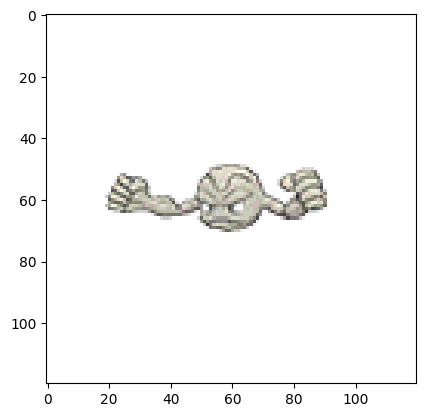

['darkgray', 'Rock', 1.0, 0.0] Favori


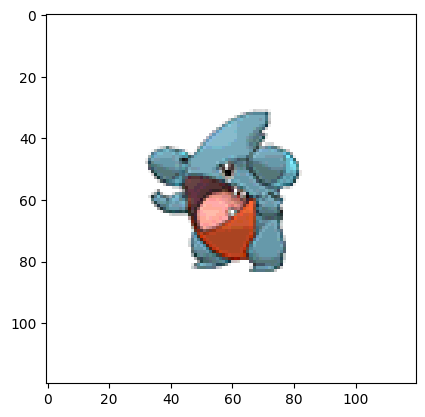

['darkgray', 'Dragon', 4.0, 0.0] Favori


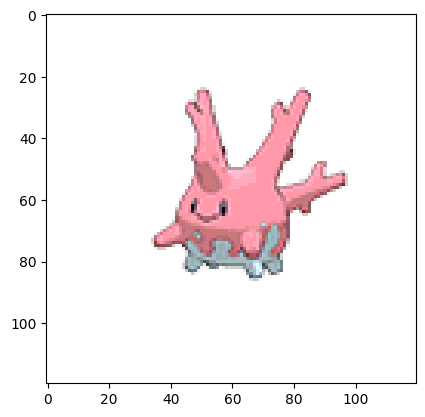

['lightpink', 'Water', 2.0, 0.0] Favori


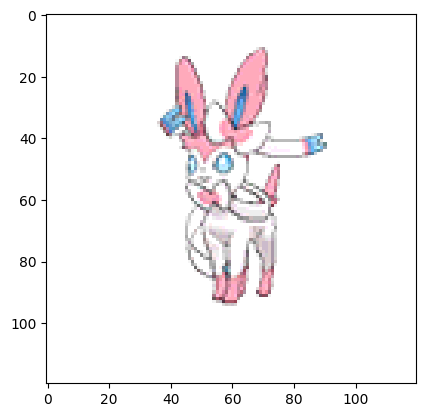

['lightpink', 'Fairy', 6.0, 0.0] Favori


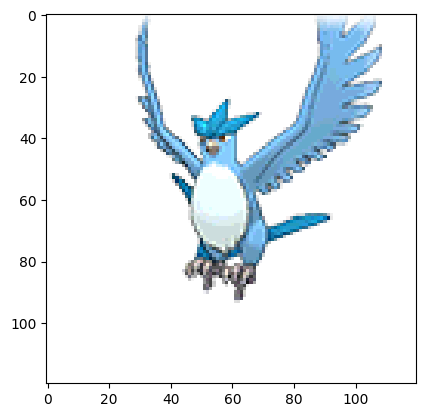

['cornflowerblue', 'Ice', 1.0, 1.0] Favori


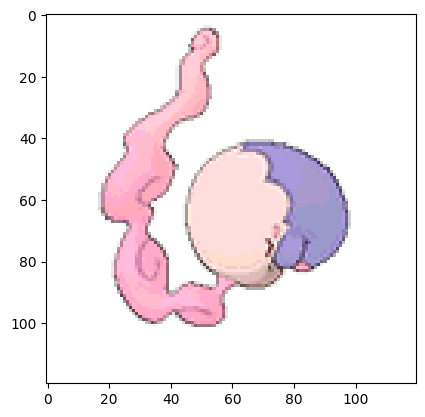

['pink', 'Psychic', 5.0, 0.0] Favori


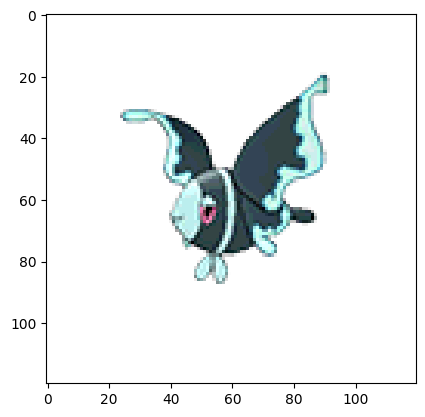

['darkslategray', 'Water', 4.0, 0.0] Favori


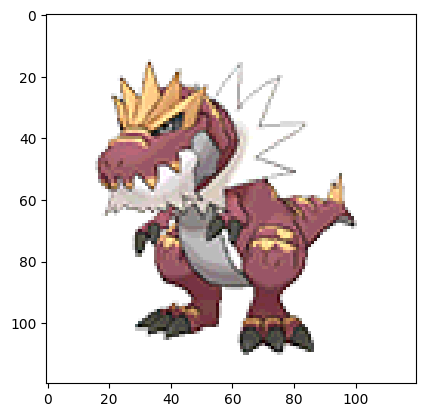

['gray', 'Rock', 6.0, 0.0] Favori


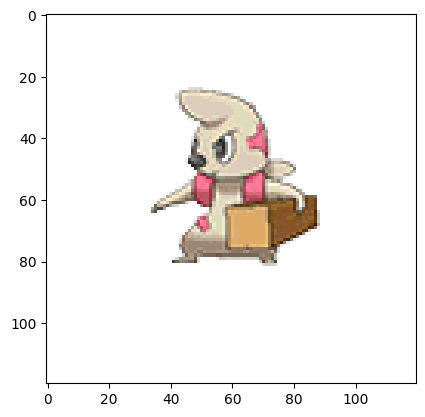

['rosybrown', 'Fighting', 5.0, 0.0] Favori


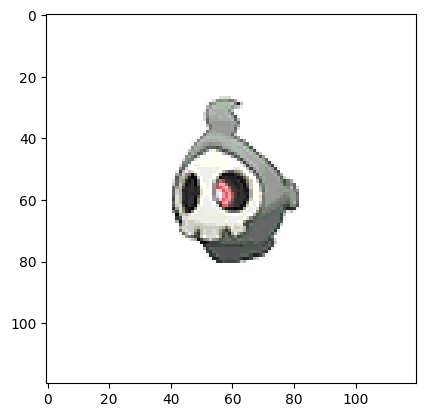

['darkslategray', 'Ghost', 3.0, 0.0] Favori


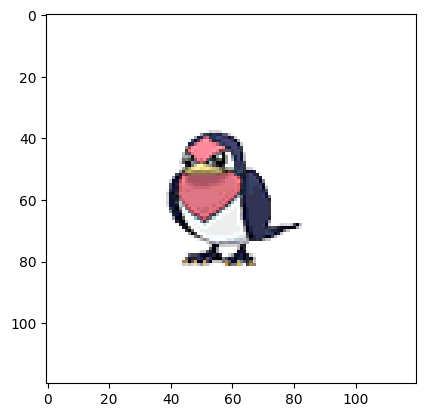

['darkslategray', 'Normal', 3.0, 0.0] Favori


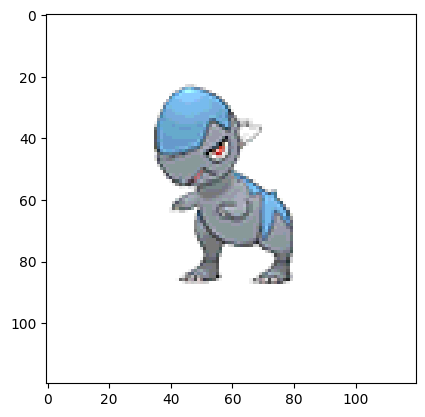

['lightslategray', 'Rock', 4.0, 0.0] Favori


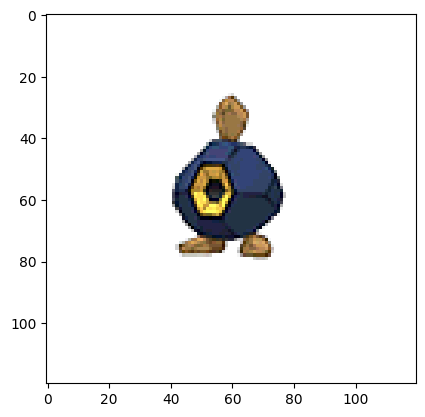

['darkslategray', 'Rock', 5.0, 0.0] Favori


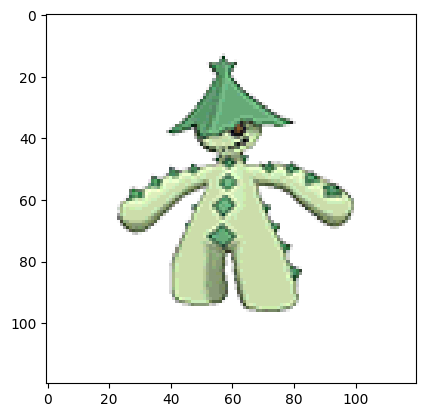

['palegoldenrod', 'Grass', 3.0, 0.0] Favori


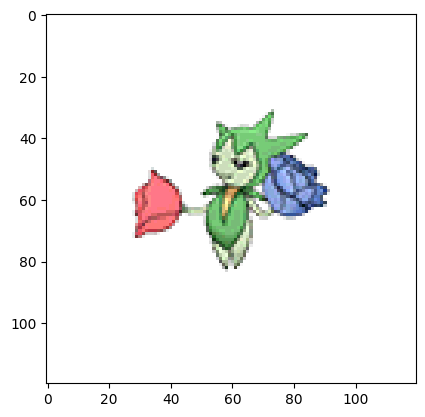

['dimgray', 'Grass', 3.0, 0.0] Favori


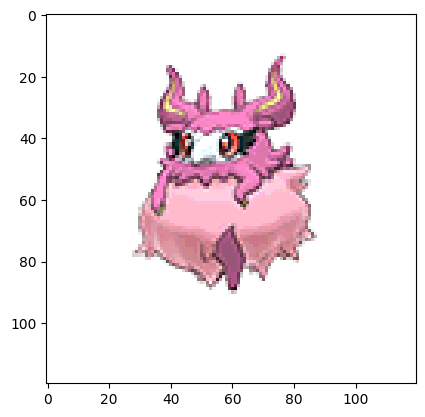

['lightpink', 'Fairy', 6.0, 0.0] Favori
Voulez vous voir une image favorite? (y/n)


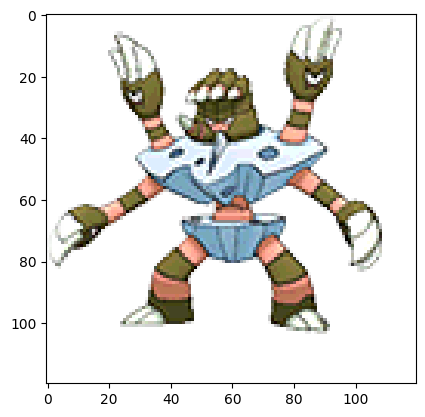

Do you like this image ? (y/n)
Voulez vous continuer ? (y/n)


In [38]:
########## Main ##########
def main():
    boule = True
    while(boule):
        generate_user_preferences()
        print("Voulez vous continuer ? (y/n)")
        rep = input()
        clear_output(wait=True)
        if rep == "y":
            boule = True
        else:
            boule = False

main()